In [2]:
# Basic imports and plotting settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [3]:
movies=pd.read_csv("D:\DataScience\Data\Movie\movies.csv")
ratings=pd.read_csv('D:/DataScience/ratings.csv')

In [4]:
print(movies.head())
print(movies.tail())
print(movies.info())
print(movies.describe())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
       movieId                           title                  genres
62418   209157                       We (2018)                   Drama
62419   209159       Window of the Soul (2001)             Documentary
62420   209163                Bad Poems (2018)            Comedy|Drama
62421   209169             A Girl Thing (2001)      (no genres listed)
62422   209171  Women of Devil's Island (1962)  Ac

In [5]:
movies.shape

(62423, 3)

In [6]:
print(ratings.shape)
print(ratings.head())
print(ratings.tail())
print(ratings.info())
print(ratings.describe())

(25000095, 4)
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
          userId  movieId  rating   timestamp
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None
             userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.

In [7]:
ratings.duplicated().sum()

np.int64(0)

In [8]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
movies.duplicated().sum()

np.int64(0)

In [10]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
ratings['ts'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [12]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [13]:
ratings

,userId,movieId,rating,timestamp,ts
0,1,296,5.0,1147880044,2006-05-17 15:34:04
1,1,306,3.5,1147868817,2006-05-17 12:26:57
2,1,307,5.0,1147868828,2006-05-17 12:27:08
3,1,665,5.0,1147878820,2006-05-17 15:13:40
4,1,899,3.5,1147868510,2006-05-17 12:21:50
...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,2009-04-28 21:16:12
25000091,162541,55768,2.5,1240951998,2009-04-28 20:53:18
25000092,162541,56176,2.0,1240950697,2009-04-28 20:31:37
25000093,162541,58559,4.0,1240953434,2009-04-28 21:17:14


In [14]:
# Duplication in movies
movies_dup_count = movies['movieId'].duplicated().sum()
print(movies_dup_count)

# Duplication in ratings
ratings_dup_count = ratings['movieId'].duplicated().sum()
print(ratings_dup_count)

0
24941048


In [15]:
# Get unique IDs from both DataFrames
movies_unique_ids = movies['movieId'].unique()
ratings_unique_ids = ratings['movieId'].unique()
print(len(ratings_unique_ids))
ratings_unique_Uids = ratings['userId'].unique()
print(len(ratings_unique_Uids))



59047
162541


In [16]:
# Find the intersection and get its length
matched_ids_count = len(set(movies_unique_ids) & set(ratings_unique_ids))
print(matched_ids_count)

59047


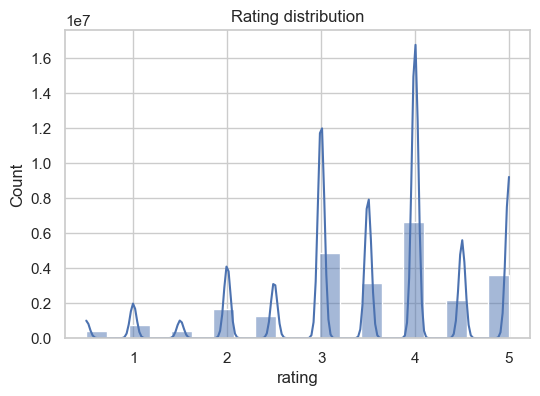

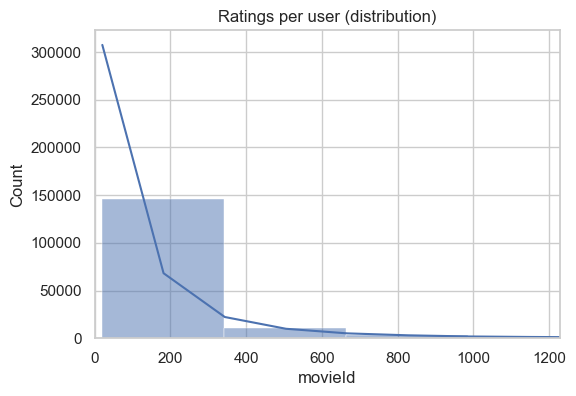

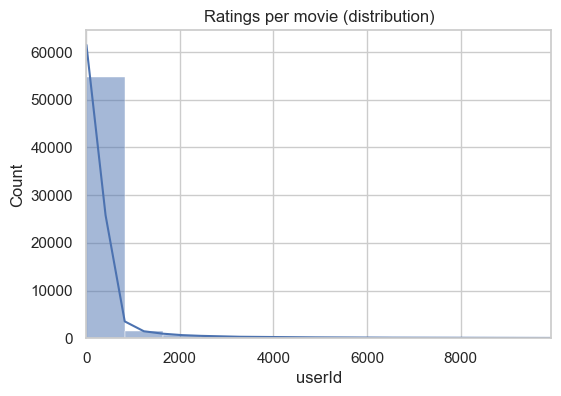

,movieId,userId,title
0,356,81491,Forrest Gump (1994)
1,318,81482,"Shawshank Redemption, The (1994)"
2,296,79672,Pulp Fiction (1994)
3,593,74127,"Silence of the Lambs, The (1991)"
4,2571,72674,"Matrix, The (1999)"
5,260,68717,Star Wars: Episode IV - A New Hope (1977)
6,480,64144,Jurassic Park (1993)
7,527,60411,Schindler's List (1993)
8,110,59184,Braveheart (1995)
9,2959,58773,Fight Club (1999)


In [17]:
# rating distribution
plt.figure(figsize=(6,4))
sns.histplot(ratings['rating'], bins=20, kde=True)
plt.title('Rating distribution')
plt.show()

# ratings per user
user_counts = ratings.groupby('userId')['movieId'].count()
plt.figure(figsize=(6,4))
sns.histplot(user_counts, bins=100, kde=True)
plt.title('Ratings per user (distribution)')
plt.xlim(0, np.percentile(user_counts, 99))  # zoom to 99th percentile
plt.show()

# ratings per movie
movie_counts = ratings.groupby('movieId')['userId'].count()
plt.figure(figsize=(6,4))
sns.histplot(movie_counts, bins=100, kde=True)
plt.title('Ratings per movie (distribution)')
plt.xlim(0, np.percentile(movie_counts, 99))
plt.show()

# quick top movies by count
top_by_count = movie_counts.sort_values(ascending=False).head(20)
top_by_count = top_by_count.reset_index().merge(movies[['movieId','title']], on='movieId', how='left')
top_by_count


In [18]:
# Per-user leave-one-out (each user's latest rating goes to test)
def leave_one_out(df):
    df = df.sort_values(['userId','ts'])
    # keep last rating per user as test
    test_idx = df.groupby('userId').tail(1).index
    test = df.loc[test_idx].copy()
    train = df.drop(test_idx).copy()
    return train, test

train, test = leave_one_out(ratings)
print(train.shape, test.shape)

(24837554, 5) (162541, 5)


In [19]:
def popularity_recs(train_df, movies_df, top_n=10, min_ratings=50):
    counts = train_df.groupby('movieId')['rating'].count()
    means = train_df.groupby('movieId')['rating'].mean()
    df = pd.DataFrame({'count': counts, 'mean': means}).dropna()
    df = df[df['count'] >= min_ratings]
    df = df.sort_values(['count','mean'], ascending=False)
    recs = df.head(top_n).reset_index().merge(movies_df[['movieId','title']], on='movieId', how='left')
    return recs

pop_recs = popularity_recs(train, movies, top_n=20, min_ratings=100)
pop_recs

,movieId,count,mean,title
0,318,80977,4.413543,"Shawshank Redemption, The (1994)"
1,356,80955,4.047341,Forrest Gump (1994)
2,296,79213,4.189180,Pulp Fiction (1994)
3,593,73590,4.151522,"Silence of the Lambs, The (1991)"
4,2571,72240,4.154201,"Matrix, The (1999)"
5,260,68423,4.120771,Star Wars: Episode IV - A New Hope (1977)
6,480,63664,3.677942,Jurassic Park (1993)
7,527,59894,4.246936,Schindler's List (1993)
8,110,58897,4.002165,Braveheart (1995)
9,2959,58326,4.228277,Fight Club (1999)


In [20]:
# Create mapping tables to compact indices (saves memory)
user_mapper = {uid: i for i, uid in enumerate(train['userId'].unique())}
item_mapper = {mid: i for i, mid in enumerate(train['movieId'].unique())}
user_inv = {i: uid for uid, i in user_mapper.items()}
item_inv = {i: mid for mid, i in item_mapper.items()}

n_users = len(user_mapper)
n_items = len(item_mapper)
print("n_users, n_items:", n_users, n_items)

# build sparse matrix for train
rows = train['userId'].map(user_mapper)
cols = train['movieId'].map(item_mapper)
data = train['rating'].values
R = csr_matrix((data, (rows, cols)), shape=(n_users, n_items))

n_users, n_items: 162541 58985


In [21]:
# item-item similarity (cosine)
# compute item vectors normalization similarity with sklearn (works with dense arrays; with sparse, use cosine_similarity which accepts sparse)
item_sim = cosine_similarity(R.T, dense_output=False)  # returns sparse-ish matrix

# prediction helper: user u, item i -> predicted rating by item-based weighted sum of items rated by user
from scipy.sparse import issparse

def predict_item_based(user_id, top_k=50):
    if user_id not in user_mapper:
        return []  # cold user
    uidx = user_mapper[user_id]
    user_ratings = R.getrow(uidx).toarray().flatten()  # ratings vector length n_items
    rated_idx = np.where(user_ratings > 0)[0]
    scores = np.zeros(n_items)
    denom = np.zeros(n_items)
    for j in rated_idx:
        sim_row = item_sim[j].toarray().flatten() if issparse(item_sim[j]) else item_sim[j]
        scores += sim_row * user_ratings[j]
        denom += np.abs(sim_row)
    # safe divide
    pred = np.divide(scores, denom, out=np.zeros_like(scores), where=denom!=0)
    # mask already rated items
    pred[rated_idx] = -np.inf
    top_items_idx = np.argpartition(-pred, range(20))[:20]
    top_items = sorted(top_items_idx, key=lambda x: -pred[x])[:top_k]
    return [item_inv[i] for i in top_items]  # return original movieIds

# Example: recommendations for a user id (replace with a real user)
example_user = train['userId'].iloc[10]
rec_movieIds = predict_item_based(example_user, top_k=10)
movies[movies['movieId'].isin(rec_movieIds)][['movieId','title']].head(10)

MemoryError: Unable to allocate 10.2 GiB for an array with shape (1364117179,) and data type float64

In [ ]:
# user-user similarity
user_sim = cosine_similarity(R, dense_output=False)

def predict_user_based(user_id, top_k=10, neighbor_k=50):
    if user_id not in user_mapper:
        return []
    uidx = user_mapper[user_id]
    sim_vector = user_sim[uidx].toarray().flatten()
    # pick top neighbors
    top_neighbors = np.argpartition(-sim_vector, neighbor_k)[:neighbor_k]
    # weighted sum of neighbors' ratings
    neigh_ratings = R[top_neighbors,:].toarray()
    neigh_sims = sim_vector[top_neighbors].reshape(-1,1)
    weighted_sum = (neigh_ratings * neigh_sims).sum(axis=0)
    denom = np.abs(neigh_sims).sum()
    if denom == 0:
        return []
    pred = weighted_sum / denom
    # mask rated items
    user_rated = R.getrow(uidx).toarray().flatten() > 0
    pred[user_rated] = -np.inf
    top_idx = np.argpartition(-pred, range(top_k))[:top_k]
    top_idx_sorted = sorted(top_idx, key=lambda x: -pred[x])
    return [item_inv[i] for i in top_idx_sorted]

# quick example
predict_user_based(example_user, top_k=10)

In [ ]:
# center ratings by subtracting user mean (helps svd)
R_dense = R.toarray()
user_means = np.true_divide(R_dense.sum(axis=1), (R_dense!=0).sum(axis=1))
user_means = np.nan_to_num(user_means)  # replace NaN for users with no ratings
R_centered = R_dense.copy()
nonzero_mask = (R_dense != 0)
R_centered[nonzero_mask] = R_dense[nonzero_mask] - user_means[:,None][nonzero_mask]

# run svds
k = 50  # latent dims; tune
u, s, vt = svds(csr_matrix(R_centered), k=k)
S = np.diag(s)
# reconstruct
pred_centered = np.dot(np.dot(u, S), vt)
pred_ratings = pred_centered + user_means[:, None]

# prediction function for a user
def recommend_svd(user_id, top_k=10):
    if user_id not in user_mapper:
        return []
    uidx = user_mapper[user_id]
    preds = pred_ratings[uidx]
    # mask known
    known = R_dense[uidx] > 0
    preds[known] = -np.inf
    top_idx = np.argpartition(-preds, range(top_k))[:top_k]
    top_idx_sorted = sorted(top_idx, key=lambda x: -preds[x])
    return [item_inv[i] for i in top_idx_sorted]

# example
recommend_svd(example_user, top_k=10)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse_on_test(pred_matrix, test_df):
    # pred_matrix should be user_index x item_index predicted rating matrix
    y_true = []
    y_pred = []
    for _, row in test_df.iterrows():
        u = row['userId']
        m = row['movieId']
        if u in user_mapper and m in item_mapper:
            ui = user_mapper[u]
            mi = item_mapper[m]
            y_true.append(row['rating'])
            y_pred.append(pred_matrix[ui, mi])
    if len(y_true) == 0:
        return np.nan
    return np.sqrt(mean_squared_error(y_true, y_pred))

# compute RMSE for SVD predictions (pred_ratings)
print("SVD RMSE:", rmse_on_test(pred_ratings, test))

# For item- or user-based CF you can construct predicted matrix similarly by calling predict for each pair (slower)

In [ ]:
def precision_at_k(recommend_function, test_df, k=10, n_users=1000):
    # sample users for speed (or iterate all users)
    users = test_df['userId'].unique()
    users = np.random.choice(users, min(len(users), n_users), replace=False)
    precisions = []
    for u in users:
        true_items = set(test_df[test_df['userId']==u]['movieId'].tolist())
        if not true_items:
            continue
        recs = recommend_function(u, top_k=k)
        if not recs:
            continue
        hit_count = len(set(recs) & true_items)
        precisions.append(hit_count / k)
    return np.mean(precisions)

# example: precision@10 for SVD and item-based
print("Precision@10 SVD:", precision_at_k(recommend_svd, test, k=10, n_users=200))
print("Precision@10 ItemCF:", precision_at_k(lambda u, top_k: predict_item_based(u, top_k), test, k=10, n_users=200))

In [ ]:
def recommend(user_id, model='svd', top_k=10):
    if model == 'svd':
        ids = recommend_svd(user_id, top_k=top_k)
    elif model == 'item':
        ids = predict_item_based(user_id, top_k=top_k)
    elif model == 'user':
        ids = predict_user_based(user_id, top_k=top_k)
    elif model == 'pop':
        ids = popularity_recs(train, movies, top_n=top_k)['movieId'].tolist()
    else:
        raise ValueError("unknown model")
    return movies[movies['movieId'].isin(ids)][['movieId','title']].drop_duplicates().head(top_k)

# example
recommend(example_user, model='svd', top_k=10)